<a href="https://colab.research.google.com/github/SoheeKim12/Machine_Learning_Study/blob/main/KNN_250402.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

- 새로운 데이터가 주어졌을 때, 이 데이터와 가장 가까운 K개의 이웃 데이터를 찾아서 클래스 또는 값을 예측
- 작은 K값은 데이터 포인트와 가까운 이웃들의 특징을 보다 잘 반영하지만, 잡음과 이상치 등 노이즈를 포함하기 쉬움.
- 큰 K값은 더 많은 이웃을 포함하기 때문에 잡음과 이상치 등 노이즈의 영향을 줄이지만, 데이터 포인트 주변의 세부적인 특성을 파악하기 어려움.
- 장점: 간단하고 이해하기 쉬움, 학습 데이터의 분포를 고려하지 않아도 됨, 높은 분류 정확도
- 단점: 차원의 저주, 이상치에 민감함

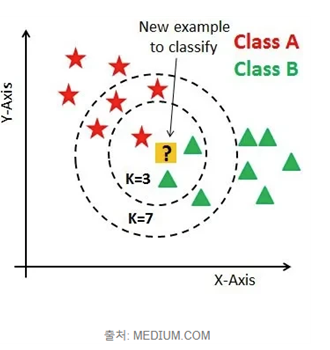

In [ ]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
#plt.style.use(['seaborn-whitegrid'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
#from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

#K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

## 붓꽃 데이터

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# 표준화
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
# 1. 기존
model = KNeighborsClassifier() # 기본값은 K=5
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 1.0


In [ ]:
# 2. 스케일
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9666666666666667
평가 데이터 점수: 0.9333333333333333


In [ ]:
# 3. 교차 검증(cross-validation)
cross_validate(
            estimator=KNeighborsClassifier(),
            X=X, y=y,
            cv=5,
            n_jobs=multiprocessing.cpu_count(), # 병렬 처리로 속도 향상
            verbose=True # 진행 상황 출력 (fold별 로그 표시)
            )

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.4s finished


{'fit_time': array([0.00224638, 0.00199604, 0.00233746, 0.00234032, 0.00173092]),
 'score_time': array([0.00665188, 0.00647759, 0.00778651, 0.00742793, 0.00642109]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [ ]:
# 4. KNN 성능 향상

param_grid = [{'n_neighbors': [3, 5, 7], # K값
               'weights': ['uniform', 'distance'], # 'uniform': 모두 같게, 'distance': 가까운 이웃에 더 큰 가중치
               'algorithm': ['ball_tree', 'kd_tree', 'brute']}] # 거리 계산 알고리즘

In [ ]:
gs = GridSearchCV(estimator=KNeighborsClassifier(),
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True
                  )

In [ ]:
gs.fit(X, y) # weights: uniform

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_)) # 98%

GridSearchCV best score: 0.9800000000000001


In [ ]:
# 5. 시각화
# 시각화 함수
def make_meshgrid(x, y, h=.02):
  x_min, x_max = x.min()-1, x.max()+1
  y_min, y_max = y.min()-1, y.max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
  return xx, yy

In [ ]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx,yy, Z, **params)
  return out

* TSNE: 높은 차원의 복잡한 데이터를 2차원에 차원 축소하는 방법,
낮은 차원 공간의 시각화에 주로 사용하며 차원 축소할 때는 비슷한 구조끼리  데이터를 정리한 상태이므로 데이터 구조를 이해하는 데 도움을 줌.

In [ ]:
tsne = TSNE(n_components=2) # TSNE: 고차원 데이터를 2D 또는 3D로 시각화하기 위해 사용하는 차원 축소 기법, 2차원으로 축소하겠다는 의미
X_comp = tsne.fit_transform(X)

In [ ]:
iris_comp_df = pd.DataFrame(data=X_comp) # X_comp: 고차원 데이터를 2차원으로 변환한 값
iris_comp_df['Target'] = y
iris_comp_df

,0,1,Target
0,-24.284670,-0.196069,0
1,-21.731905,0.653882,0
2,-21.776773,-0.433848,0
3,-21.413086,-0.141203,0
4,-24.284908,-0.606254,0
...,...,...,...
145,14.369648,-2.493189,2
146,11.872075,-0.541414,2
147,13.772250,-1.774297,2
148,14.138768,-3.394210,2


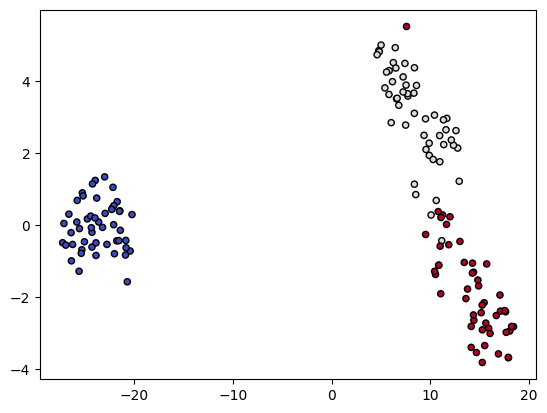

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
            c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
# KNN에 적용
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

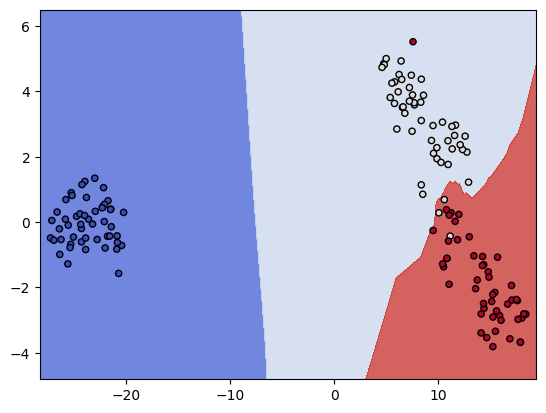

In [ ]:
# 결정경계 시각화(분류가 어떻게 되었는지)

# 시각화를 위해 X축과 Y축 범위로 메쉬 그리드 생성(2차원 평면 상의 예측을 위한 좌표 격자)
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
# 위에서 만든 메쉬그리드의 각 점에 대해 예측하고, 예측된 값을 바탕으로 결정 경계를 색으로 시각화
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k'); # 고르게 잘 찾아낸 것을 알 수 있음

## 유방암 데이터

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df # 악성 or 양성인지에 대한 features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
cancer_train_df = pd.DataFrame(data=X_train, columns=cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,8.671,14.45,54.42,227.2,0.09138,0.04276,0.00000,0.00000,0.1722,0.06724,...,17.04,58.36,259.2,0.11620,0.07057,0.00000,0.00000,0.2592,0.07848,1
1,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136,1
2,15.270,12.91,98.17,725.5,0.08182,0.06230,0.05892,0.03157,0.1359,0.05526,...,15.92,113.70,932.7,0.12220,0.21860,0.29620,0.10350,0.2320,0.07474,1
3,13.900,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,...,21.80,101.20,718.9,0.09384,0.20060,0.13840,0.06222,0.2679,0.07698,1
4,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,30.70,115.70,985.5,0.13680,0.42900,0.35870,0.18340,0.3698,0.10940,0
451,16.130,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,0.07356,...,31.48,136.80,1315.0,0.17890,0.42330,0.47840,0.20730,0.3706,0.11420,0
452,14.970,16.95,96.22,685.9,0.09855,0.07885,0.02602,0.03781,0.1780,0.05650,...,23.00,104.60,793.7,0.12160,0.16370,0.06648,0.08485,0.2404,0.06428,1
453,12.340,14.95,78.29,469.1,0.08682,0.04571,0.02109,0.02054,0.1571,0.05708,...,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974,1


In [ ]:
cancer_test_df = pd.DataFrame(data=X_test, columns=cancer.feature_names)
cancer_test_df['target'] = y_test
cancer_test_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,19.590,18.15,130.70,1214.0,0.11200,0.16660,0.25080,0.12860,0.2027,0.06082,...,26.39,174.90,2232.0,0.14380,0.3846,0.6810,0.22470,0.3643,0.09223,0
1,19.270,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,...,30.90,161.40,1813.0,0.15090,0.6590,0.6091,0.17850,0.3672,0.11230,0
2,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,...,47.16,214.00,3432.0,0.14010,0.2644,0.3442,0.16590,0.2868,0.08218,0
3,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,27.78,118.60,784.7,0.13160,0.4648,0.4589,0.17270,0.3000,0.08701,0
4,11.410,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.02361,0.1167,0.06217,...,17.70,79.12,467.2,0.11210,0.1610,0.1648,0.06296,0.1811,0.07427,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,15.610,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,0.05443,...,31.67,115.90,988.6,0.10840,0.1807,0.2260,0.08568,0.2683,0.06829,0
110,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,0.2157,0.06768,...,27.37,127.10,1095.0,0.18780,0.4480,0.4704,0.20270,0.3585,0.10650,0
111,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,...,24.17,119.40,915.3,0.15500,0.5046,0.6872,0.21350,0.4245,0.10500,0
112,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,0.07751,...,31.89,54.49,223.6,0.15960,0.3064,0.3393,0.05000,0.2790,0.10660,1


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9560439560439561
평가 데이터 점수: 0.9122807017543859


In [ ]:
# scale한것과 비교
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.9802197802197802
평가 데이터 점수: 0.9473684210526315


In [ ]:
estimator = make_pipeline(
  StandardScaler(),
  KNeighborsClassifier()
)

In [ ]:
cross_validate(
  estimator=estimator,
  X=X, y=y,
  cv=5,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.5s finished


{'fit_time': array([0.00548506, 0.00464344, 0.00363159, 0.00330186, 0.00889087]),
 'score_time': array([0.03170967, 0.02997923, 0.014117  , 0.01440072, 0.00787425]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [ ]:
pipe = Pipeline(
      [('scaler', StandardScaler()),
      ('model', KNeighborsClassifier())]
)

In [ ]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights': ['uniform', 'distance'],
              'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
     estimator=pipe,
     param_grid=param_grid,
     n_jobs=multiprocessing.cpu_count(),
     verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
cancer_comp_df = pd.DataFrame(data=X_comp)
cancer_comp_df['target'] = y
cancer_comp_df

,0,1,target
0,42.337463,-12.640097,0
1,42.500240,-9.928030,0
2,37.894382,-10.039126,0
3,-17.654438,1.451124,0
4,36.764866,-7.930646,0
...,...,...,...
564,44.029003,-9.311248,0
565,38.830563,-9.435006,0
566,22.498896,-2.705058,0
567,40.378845,-10.038561,0


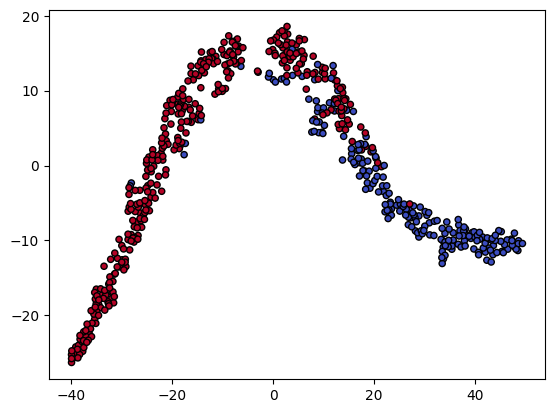

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

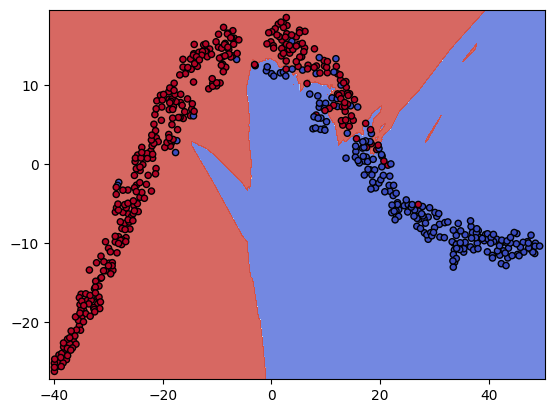

In [ ]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

## 와인 데이터

In [ ]:
wine = load_wine()

In [ ]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
wine_train_df = pd.DataFrame(data=X_train, columns=wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0,1
1,12.00,3.43,2.00,19.0,87.0,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564.0,1
2,13.88,5.04,2.23,20.0,80.0,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415.0,2
3,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0
4,13.56,1.71,2.31,16.2,117.0,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0,1
138,12.37,1.13,2.16,19.0,87.0,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420.0,1
139,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
140,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0,2


In [ ]:
wine_test_df = pd.DataFrame(data=X_test, columns=wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1
1,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
2,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0,0
3,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0,0
4,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0,0
5,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
6,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1
7,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
8,13.94,1.73,2.27,17.4,108.0,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260.0,0
9,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0,0


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7887323943661971
평가 데이터 점수: 0.6944444444444444


In [ ]:
# scale한것과 비교
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.971830985915493
평가 데이터 점수: 1.0


In [ ]:
estimator = make_pipeline(
  StandardScaler(),
  KNeighborsClassifier()
)

In [ ]:
cross_validate(
  estimator=estimator,
  X=X, y=y,
  cv=5,
  n_jobs=multiprocessing.cpu_count(),
  verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.7s finished


{'fit_time': array([0.01164007, 0.00889659, 0.0038023 , 0.00343275, 0.0034914 ]),
 'score_time': array([0.015697  , 0.00712991, 0.00681829, 0.00700164, 0.00711131]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}

In [ ]:
pipe = Pipeline(
      [('scaler', StandardScaler()),
      ('model', KNeighborsClassifier())]
)

In [ ]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
              'model__weights': ['uniform', 'distance'],
              'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
     estimator=pipe,
     param_grid=param_grid,
     n_jobs=multiprocessing.cpu_count(),
     verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9665079365079364


In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
wine_comp_df = pd.DataFrame(data=X_comp)
wine_comp_df['target'] = y
wine_comp_df

,0,1,target
0,11.885133,-0.480538,0
1,11.506394,-1.147849,0
2,14.050035,-1.015527,0
3,16.863930,-1.384284,0
4,3.268320,-0.451542,0
...,...,...,...
173,3.289910,-0.019914,2
174,3.707676,-0.103938,2
175,6.272249,-0.490825,2
176,6.423851,-0.620846,2


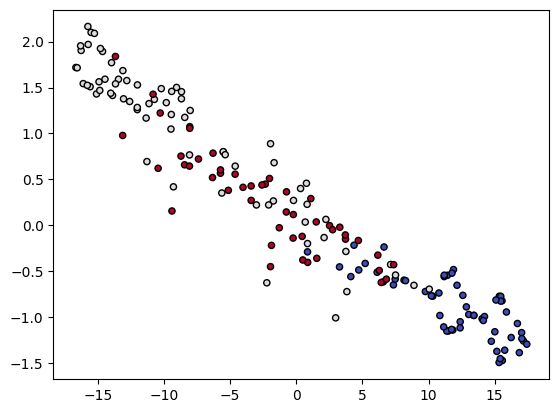

In [ ]:
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

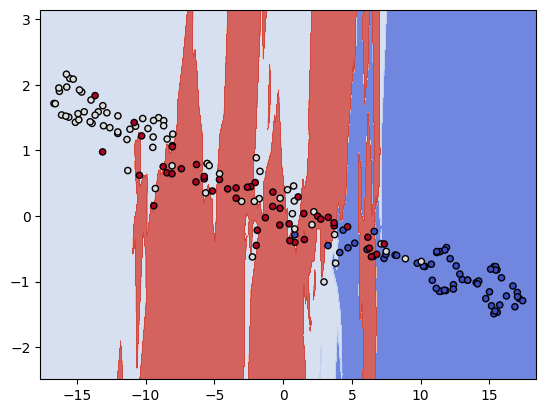

In [ ]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k');

# k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [ ]:
import pandas as pd

boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = boston.drop(columns=['MEDV'])  # MEDV 컬럼을 제외한 나머지 변수들
y = boston['MEDV']  # MEDV 컬럼을 y로 설정

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6802553713152331
평가 데이터 점수: 0.4031499855487205


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.8380185656631502
평가 데이터 점수: 0.6948011173872088


In [ ]:
estimator = make_pipeline( # 전처리 과정과 모델을 하나로 묶어줌
            StandardScaler(),
            KNeighborsRegressor())

In [ ]:
cross_validate(estimator=estimator,
                X=X, y=y,
                cv=5,
                n_jobs=multiprocessing.cpu_count(),
                verbose=True)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.0s finished


{'fit_time': array([0.01460433, 0.0164299 , 0.01697397, 0.0156095 , 0.01320505]),
 'score_time': array([0.00711465, 0.00631046, 0.01518941, 0.01197481, 0.01075959]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [ ]:
# Pipeline: 여러 단계를 하나로 묶어줌
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor())])

In [ ]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(estimator=pipe,
                  param_grid=param_grid,
                  n_jobs=multiprocessing.cpu_count(),
                  verbose=True)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7,
                                     weights='distance'))])

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_)) # 과적합 또는 스케일링이 적절하지 않은 경우?

GridSearchCV best score: 0.4973060611762845


In [ ]:
tsne = TSNE(n_components=1) # regresor은 component가 1
X_comp = tsne.fit_transform(X)

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,-20.210340,24.0
1,-41.163643,21.6
2,-41.927677,34.7
3,-43.332367,33.4
4,-43.481697,36.2
...,...,...
501,-27.629189,22.4
502,-28.276897,20.6
503,-29.065430,23.9
504,-29.020803,22.0


<ipython-input-76-2e14203f0af2>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


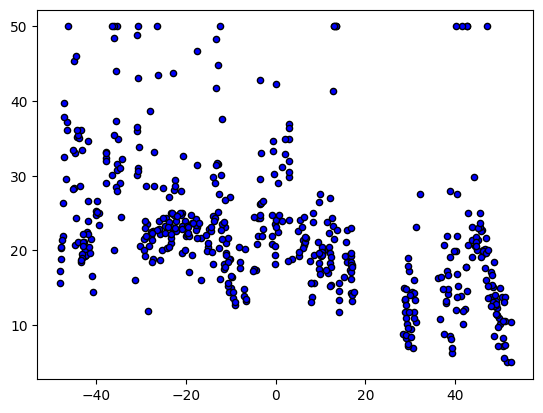

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

<ipython-input-78-89eccaf1f067>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
<ipython-input-78-89eccaf1f067>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k'); # predict된 부분이 빨간색


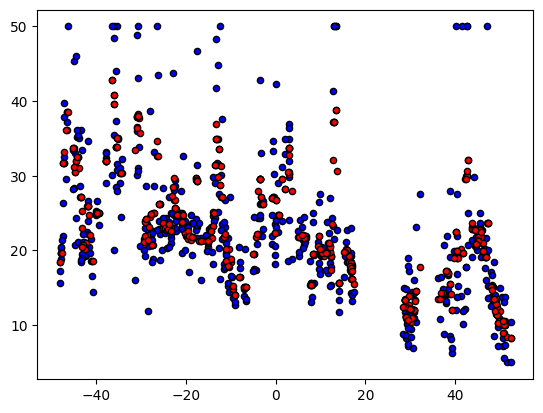

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k'); # predict된 부분이 빨간색

### 캘리포니아 주택 가격 데이터

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing()

In [ ]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df['TARGET'] = california.target
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
X, y = california.data, california.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
california_train_df = pd.DataFrame(data=X_train, columns=california.feature_names)
california_train_df['TARGET'] = y_train
california_train_df # 16512건

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,0.9336,10.0,3.662745,1.019608,401.0,1.572549,37.66,-120.98,1.271
1,4.2500,18.0,5.601974,1.038651,3704.0,3.046053,33.87,-118.25,1.692
2,3.6500,10.0,5.502092,1.060371,5935.0,3.547519,37.82,-121.28,1.194
3,1.5603,41.0,2.709265,1.031949,1428.0,4.562300,34.02,-118.26,1.096
4,5.0395,36.0,4.309353,0.899281,361.0,2.597122,33.89,-118.13,2.258
...,...,...,...,...,...,...,...,...,...
16507,4.7853,7.0,4.383016,1.194107,1215.0,2.105719,34.10,-118.18,1.531
16508,5.0206,8.0,6.500000,0.986207,835.0,2.879310,34.95,-120.40,2.610
16509,3.0642,48.0,3.472885,1.006508,784.0,1.700651,34.11,-118.33,3.429
16510,3.1505,9.0,5.623120,1.054511,3515.0,3.303571,34.46,-117.34,1.020


In [ ]:
california_test_df = pd.DataFrame(data=X_test, columns=california.feature_names)
california_test_df['TARGET'] = y_test
california_test_df # 4128건

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,4.8365,35.0,5.720635,0.923810,841.0,2.669841,37.33,-121.99,3.139
1,2.5833,29.0,3.481836,1.124283,1397.0,2.671128,33.95,-118.38,1.875
2,3.8125,29.0,4.638537,1.130802,1509.0,2.122363,34.27,-119.23,2.445
3,3.8274,52.0,5.341959,1.055453,1769.0,3.269871,37.72,-122.44,2.520
4,7.3195,37.0,7.506770,1.083172,1315.0,2.543520,37.89,-122.20,3.675
...,...,...,...,...,...,...,...,...,...
4123,4.8750,31.0,4.104603,0.928870,734.0,3.071130,33.90,-118.35,2.324
4124,5.0524,17.0,6.879004,1.092527,2630.0,3.119810,32.87,-116.86,2.854
4125,3.1857,24.0,4.902494,1.040816,1468.0,3.328798,37.67,-121.03,0.983
4126,4.8424,23.0,5.381188,1.022631,6034.0,4.267327,37.34,-121.82,1.953


In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test))) # 거의 못맞추는것

학습 데이터 점수: 0.4503499563216057
평가 데이터 점수: 0.14697762875822995


In [ ]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor()

In [ ]:
print("학습 데이터 점수: {}".format(model.score(X_train_scale, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test_scale, y_test)))

학습 데이터 점수: 0.7949820342414646
평가 데이터 점수: 0.6733400986548568


In [ ]:
estimator = make_pipeline(
StandardScaler(),
KNeighborsRegressor()
)

In [ ]:
cross_validate(
estimator=estimator,
X=X, y=y,
cv=5,
n_jobs=multiprocessing.cpu_count(),
verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.9s finished


{'fit_time': array([0.04254436, 0.04184651, 0.03791332, 0.03802729, 0.04084969]),
 'score_time': array([0.6367178 , 0.52902699, 0.56583047, 0.70898509, 0.58676076]),
 'test_score': array([0.47879396, 0.4760079 , 0.57624554, 0.50259828, 0.57228584])}

In [ ]:
pipe = Pipeline(
[('scaler', StandardScaler()),
('model', KNeighborsRegressor())]
)

In [ ]:
param_grid = [{'model__n_neighbors': [3, 5, 7],
'model__weights': ['uniform', 'distance'],
'model__algorithm': ['ball_tree', 'kd_tree', 'brute']}]

In [ ]:
gs = GridSearchCV(
estimator=pipe,
param_grid=param_grid,
n_jobs=multiprocessing.cpu_count(),
verbose=True
)

In [ ]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [ ]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsRegressor(algorithm='brute', n_neighbors=7,
                                     weights='distance'))])

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.5376515274379834


In [ ]:
tsne = TSNE(n_components=1) # regresor은 component가 1, 1차원으로
X_comp = tsne.fit_transform(X)

In [ ]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,-116.769104,4.526
1,89.227425,3.585
2,-98.721977,3.521
3,-90.616730,3.413
4,-89.922958,3.422
...,...,...
20635,-46.852879,0.781
20636,-113.767998,0.771
20637,-23.147985,0.923
20638,-61.939793,0.847


<ipython-input-59-2e14203f0af2>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');


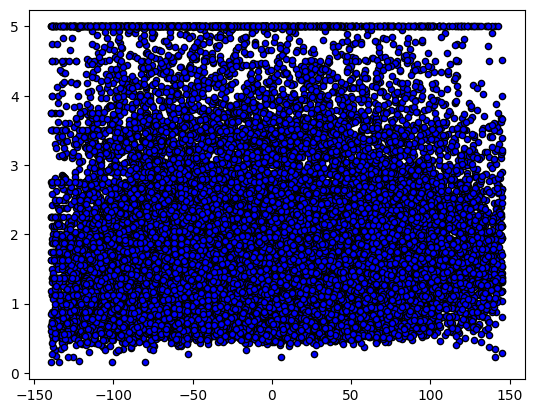

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');

In [ ]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

<ipython-input-61-89eccaf1f067>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
<ipython-input-61-89eccaf1f067>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k'); # predict된 부분이 빨간색


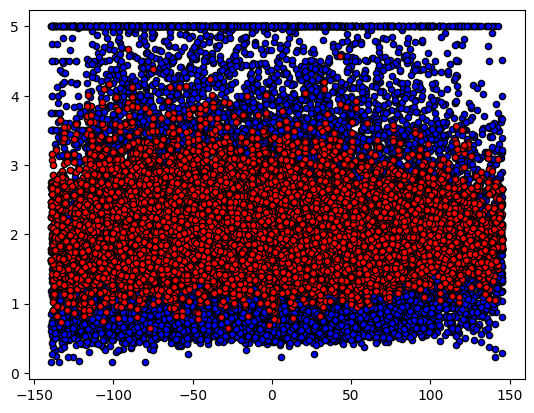

In [ ]:
plt.scatter(X_comp, y, c='b', cmap=plt.cm.coolwarm, s=20, edgecolors='k');
plt.scatter(X_comp, predict, c='r', cmap=plt.cm.coolwarm, s=20, edgecolors='k'); # predict된 부분이 빨간색